# CUSTOMER CHURN PREDICTION


### CONTENT

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

### 1. LOAD LIBRARIES

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend import plotting

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

### 2. LOAD DATA

In [2]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA-606/main/Telco-Customer-Churn.csv') 

print(f"Data Shape : {data.shape}") # Get shape

data.head() # Top 5 rows

Data Shape : (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. DATA CLEANING

#### 3.1 DATATYPE CHECK AND CONVERSION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# the TotalCharges column is present as object, whereas it should be in float
print(sorted(data['TotalCharges'].unique())[0:5])

[' ', '100.2', '100.25', '100.35', '100.4']


In [5]:
## it has a value present as ' ', which can be count as null
## replacing ' ' to np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [6]:
## convert TotalCharges into float
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [7]:
# convert Churn column into binary output
data['Churn_binary'] = data['Churn'].map({'No': 0, "Yes" : 1})

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Churn_binary          int64
dtype: object

#### 3.2 NULL VALUE ANALYSIS

In [9]:
data.isnull().sum() ## check for null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_binary         0
dtype: int64

In [10]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0


In [11]:
## only TotalCharges has null values, count 11
## as the percentage of null values are very less as compared to the total rows in dataset
## we can remove these rows
## as total charges might be an important column for customer churn, so as it is unknown
## imputing might not be a good option

data = data.dropna().reset_index(drop=True)
print(f"New Shape : {data.shape}")

New Shape : (7032, 22)


#### 3.3 DATA DUPLICATION ANALYSIS

In [12]:
data[data.duplicated()] # no duplicate rows present in the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary


#### 3.4 PONTETIAL JUNK VALUE CHECK

In [13]:
data.describe() # no potential junk values can be seen

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_binary
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### 4. CHURN ANALYSIS

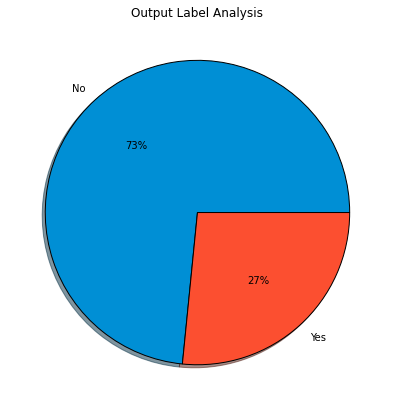

In [14]:
target = data['Churn'].value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(target.values(), labels = target.keys(), 
        wedgeprops={'edgecolor': 'black'}, 
        colors = ['#008fd5', '#fc4f30'], 
        autopct='%.0f%%', 
        shadow=True)
plt.title('Output Label Analysis')
plt.show()

*The pie chart shows that the dataset is imbalanced, with 27% only of the data belongs to churn class.*

### 5. HELPER FUNCTIONS

In [15]:
def distibution_plot_v1(data, column_list, num_row, num_col, figsize = (15,5)):
    fig = plt.figure(figsize=figsize)
    for idx, column in enumerate(column_list):
        plt.subplot(num_row, num_col, idx+1)
        plot = sns.distplot(data[column])
        plt.title(column)
        plt.xlabel('')
    plt.show()

In [16]:
def distibution_plot_v2(data, column_list, target_column, target_labels, num_row, num_col,
                        figsize = (15,5)):
    fig = plt.figure(figsize=figsize)
    for idx, column in enumerate(column_list):
        plt.subplot(num_row, num_col, idx+1)
        # Plot distribution plot for both labels present in the target
        sns.distplot(data[data[target_column] == target_labels[0]][column])
        sns.distplot(data[data[target_column] == target_labels[1]][column])
        plt.title(column)
        plt.legend(['No', 'Yes'])
        plt.xlabel('')
    plt.show()

In [17]:
def box_plot(data, column_list, target_column, target_labels, num_row, num_col,
                        figsize = (15,5)):
    fig = plt.figure(figsize=figsize)
    for idx, column in enumerate(column_list):
        plt.subplot(num_row, num_col, idx+1)
        # Plot distribution plot for both labels present in the target
        sns.boxplot(x=target_column, y=column, data=data)
        plt.title(column)
        plt.legend(target_labels)
        plt.xlabel('')
    plt.show()

### 6. EXPLORATORY DATA ANALYSIS

#### 6.1 DISTRIBUTION PLOT ANALYSIS OF MONTHLY, AND TOTAL CHARGES

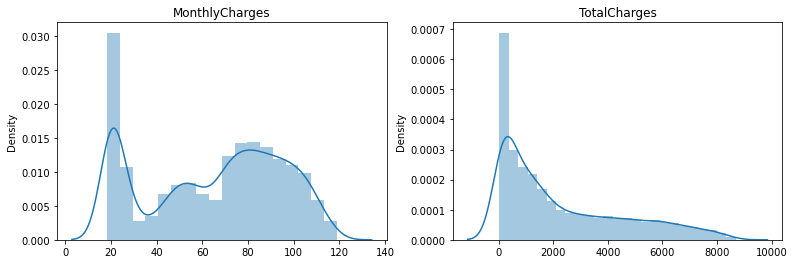

In [18]:
charges_column_list = ['MonthlyCharges', 'TotalCharges']
output_colmn_name = 'Churn_binary'
output_labels = [0, 1]

# Get distribution plot
distibution_plot_v1(data, charges_column_list, num_row = 1, num_col = 2, figsize = (13,4))

In [19]:
# Degree of skewness for charges columns
monthly_skewness = data['MonthlyCharges'].skew()
total_skewness = data['TotalCharges'].skew()

print(f"MonthlyCharges skewness: {monthly_skewness : .4f}")
print(f"TotalCharges skewness  : {total_skewness : .4f}", )

MonthlyCharges skewness: -0.2221
TotalCharges skewness  :  0.9616


*From distibution plots and skewness value we can determine, TotalCharges column is highly right-skewed, whereas MonthlyCharges is slightly left skewed.*

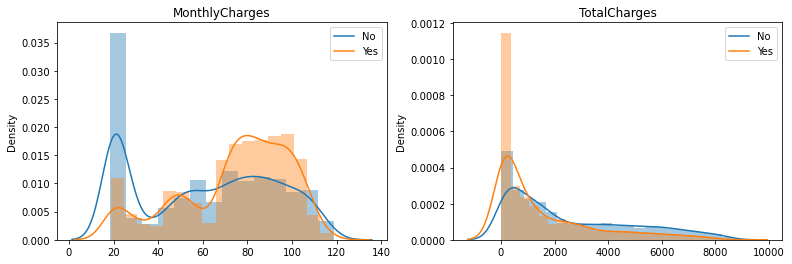

In [20]:
distibution_plot_v2(data, charges_column_list, output_colmn_name, output_labels,
                    num_row = 1, num_col = 2, figsize = (13,4))

*Distribution plot of both charges column for churned customer and non-churned customers are almost overlapping for total charges whereas it is slightly different in case of monthly charges. Still they are not significantly different from each other.*

#### 6.2 BOX PLOT ANALYSIS OF MONTHLY, AND TOTAL CHARGES

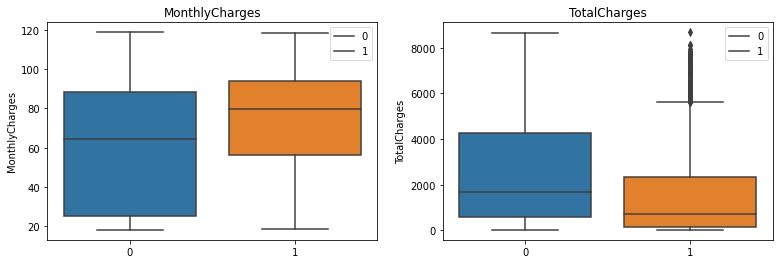

In [21]:
box_plot(data, charges_column_list, output_colmn_name, output_labels,num_row = 1, 
         num_col = 2, figsize = (13,4))

*This plot shows the distribution of monthly charges for each value of the 'Churn' column (i.e., customers who churned vs. those who did not). We can see that customers who churned tend to have higher monthly charges, and have low total charges.*

#### 6.3 BIVARIATE ANALYSIS: CONTRACT VS. CHURN

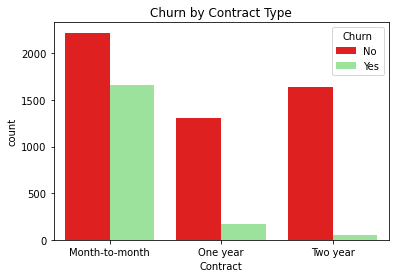

In [22]:
sns.countplot(x='Contract', hue='Churn', data=data, palette=['red', 'lightgreen'])
plt.title('Churn by Contract Type')
plt.show()

*This plot shows the number of customers in each contract type for each value of the 'Churn' column. We can see that customers on month-to-month contracts are more likely to churn than those on longer-term contracts.*

#### 6.4 MULTIVARIATE ANALYSIS: MONTHLYCHARGES VS. CHURN BY CONTRACT

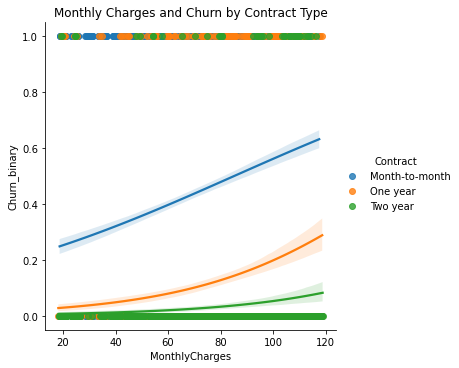

In [23]:
sns.lmplot(x='MonthlyCharges', y='Churn_binary', hue='Contract', data=data, logistic=True)
plt.title('Monthly Charges and Churn by Contract Type')
plt.show()

*This plot shows the relationship between monthly charges, churn, and contract type. The logistic regression lines show the probability of churn based on monthly charges for each contract type. We can see that the relationship between monthly charges and churn differs for customers on different types of contracts.*

*It shows with increase in monthly charges for month to month contract has a linear relationship with the churn probability. As we have already seen high monthly charges are the reason of most of the churn customer. But If we combine high monthly charge with month-to-month contract the probability of churn gets high.*

#### 6.5 'MULTIVARIATE ANALYSIS: MONTHLYCHARGES VS. CHURN BY INTERNETSERVICE AND TECHSUPPORT'

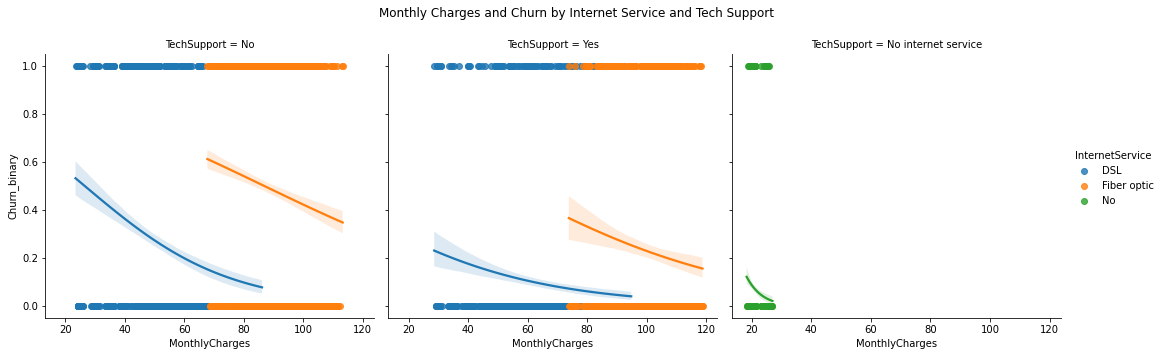

In [24]:
sns.lmplot(x='MonthlyCharges', y='Churn_binary', hue='InternetService', col='TechSupport',
           data=data, logistic=True)
plt.subplots_adjust(top=0.85)
plt.suptitle('Monthly Charges and Churn by Internet Service and Tech Support')
plt.show()

*This plot shows the relationship between monthly charges, churn, internet service, and tech support. The logistic regression lines show the probability of churn based on monthly charges for each combination of internet service and tech support. We can see that the relationship between monthly charges and churn differs for customers with different types of internet service and tech support.*

#### 6.6 CHURN ANALYSIS BASED ON CUSTOMER DEMOGRAPHICS

In [25]:
# Analyze the churn rate
churn_rate = data["Churn"].value_counts(normalize=True) * 100
print("Churn Rate:")
churn_rate

Churn Rate:


No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [26]:
# Calculate the percentage of customers who churned based on gender
gender_churn_rate = data.groupby(['gender', 'Churn'])['Churn'].count().unstack()
gender_churn_rate['total'] = gender_churn_rate.sum(axis=1)
gender_churn_rate['Churn_rate'] = round(gender_churn_rate['Yes'] / gender_churn_rate['total'] * 100, 2)
print("\nGender Churn Rate:")
gender_churn_rate


Gender Churn Rate:


Churn,No,Yes,total,Churn_rate
gender,,,,
Female,2544,939,3483,26.96
Male,2619,930,3549,26.20


In [27]:
# Calculate the percentage of customers who churned based on senior citizen status
senior_churn_rate = data.groupby(['SeniorCitizen', 'Churn'])['Churn'].count().unstack()
senior_churn_rate['total'] = senior_churn_rate.sum(axis=1)
senior_churn_rate['Churn_rate'] = round(senior_churn_rate['Yes'] / senior_churn_rate['total'] * 100, 2)
print("Senior Citizen Churn Rate:")
senior_churn_rate

Senior Citizen Churn Rate:


Churn,No,Yes,total,Churn_rate
SeniorCitizen,,,,
0,4497,1393,5890,23.65
1,666,476,1142,41.68


In [28]:
# Calculate the percentage of customers who churned based on partner status
partner_churn_rate = data.groupby(['Partner', 'Churn'])['Churn'].count().unstack()
partner_churn_rate['total'] = partner_churn_rate.sum(axis=1)
partner_churn_rate['Churn_rate'] = round(partner_churn_rate['Yes'] / partner_churn_rate['total'] * 100, 2)
print("Partner Churn Rate:")
partner_churn_rate

Partner Churn Rate:


Churn,No,Yes,total,Churn_rate
Partner,,,,
No,2439,1200,3639,32.98
Yes,2724,669,3393,19.72


In [29]:
# Calculate the percentage of customers who churned based on dependent status
dependent_churn_rate = data.groupby(['Dependents', 'Churn'])['Churn'].count().unstack()
dependent_churn_rate['total'] = dependent_churn_rate.sum(axis=1)
dependent_churn_rate['Churn_rate'] = round(dependent_churn_rate['Yes'] / dependent_churn_rate['total'] * 100,2)
print("Dependent Churn Rate:")
dependent_churn_rate

Dependent Churn Rate:


Churn,No,Yes,total,Churn_rate
Dependents,,,,
No,3390,1543,4933,31.28
Yes,1773,326,2099,15.53


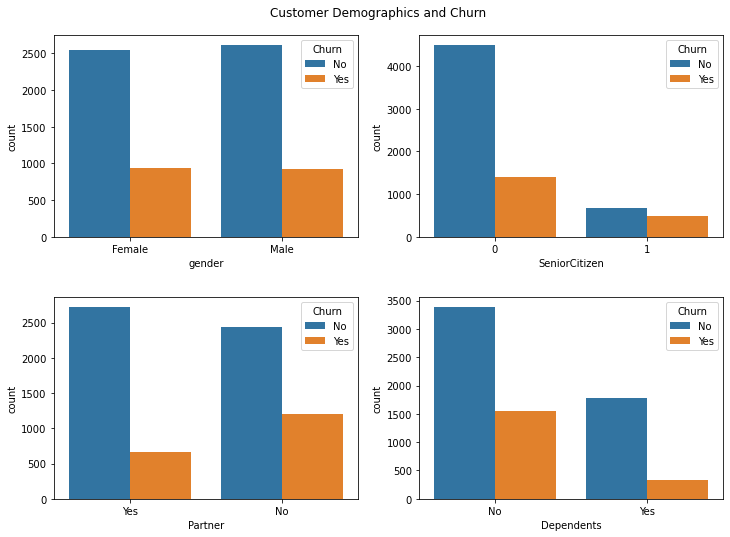

In [30]:
# Create a grid of plots for customer demographics
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(x='gender', hue='Churn', data=data, ax=ax[0][0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, ax=ax[0][1])
sns.countplot(x='Partner', hue='Churn', data=data, ax=ax[1][0])
sns.countplot(x='Dependents', hue='Churn', data=data, ax=ax[1][1])
plt.subplots_adjust(hspace=0.3, top=0.93)
plt.suptitle('Customer Demographics and Churn')
plt.show()

*The senior citizen and gender doesn't have a strong relationship with churn column. Customer's having no partner or no dependent has highly likely to chrun as compared to those have partners or dependents.*

#### 6.6 CHURN ANALYSIS BASED ON SERVICE TAKEN BY CUSTOMERS

In [31]:
# Calculate the percentage of customers who churned based on PhoneService
phone_churn_rate = data.groupby(['PhoneService', 'Churn'])['Churn'].count().unstack()
phone_churn_rate['total'] = phone_churn_rate.sum(axis=1)
phone_churn_rate['Churn_rate'] = round(phone_churn_rate['Yes'] / phone_churn_rate['total'] * 100, 2)
print("Phone Service Churn Rate:")
phone_churn_rate

Phone Service Churn Rate:


Churn,No,Yes,total,Churn_rate
PhoneService,,,,
No,510,170,680,25.00
Yes,4653,1699,6352,26.75


In [32]:
# Calculate the percentage of customers who churned based on MultipleLines
multi_churn_rate = data.groupby(['MultipleLines', 'Churn'])['Churn'].count().unstack()
multi_churn_rate['total'] = multi_churn_rate.sum(axis=1)
multi_churn_rate['Churn_rate'] = round(multi_churn_rate['Yes'] / multi_churn_rate['total'] * 100, 2)
print("Multiple Lines Churn Rate:")
multi_churn_rate

Multiple Lines Churn Rate:


Churn,No,Yes,total,Churn_rate
MultipleLines,,,,
No,2536,849,3385,25.08
No phone service,510,170,680,25.00
Yes,2117,850,2967,28.65


In [33]:
# Calculate the percentage of customers who churned based on InternetService
internet_churn_rate = data.groupby(['InternetService', 'Churn'])['Churn'].count().unstack()
internet_churn_rate['total'] = internet_churn_rate.sum(axis=1)
internet_churn_rate['Churn_rate'] = round(internet_churn_rate['Yes'] / internet_churn_rate['total'] * 100, 2)
print("\nInternet Service Churn Rate:")
internet_churn_rate


Internet Service Churn Rate:


Churn,No,Yes,total,Churn_rate
InternetService,,,,
DSL,1957,459,2416,19.00
Fiber optic,1799,1297,3096,41.89
No,1407,113,1520,7.43


In [34]:
# Calculate the percentage of customers who churned based on StreamingTV
stream_tv_churn_rate = data.groupby(['StreamingTV', 'Churn'])['Churn'].count().unstack()
stream_tv_churn_rate['total'] = stream_tv_churn_rate.sum(axis=1)
stream_tv_churn_rate['Churn_rate'] = round(stream_tv_churn_rate['Yes'] / stream_tv_churn_rate['total'] * 100, 2)
print("\nStreaming TV Churn Rate:")
stream_tv_churn_rate


Streaming TV Churn Rate:


Churn,No,Yes,total,Churn_rate
StreamingTV,,,,
No,1867,942,2809,33.54
No internet service,1407,113,1520,7.43
Yes,1889,814,2703,30.11


In [35]:
# Calculate the percentage of customers who churned based on StreamingMovies
stream_movies_churn_rate = data.groupby(['StreamingMovies', 'Churn'])['Churn'].count().unstack()
stream_movies_churn_rate['total'] = stream_movies_churn_rate.sum(axis=1)
stream_movies_churn_rate['Churn_rate'] = round(stream_movies_churn_rate['Yes'] / stream_movies_churn_rate['total'] * 100, 2)
print("\nStreaming Movies Churn Rate:")
stream_movies_churn_rate


Streaming Movies Churn Rate:


Churn,No,Yes,total,Churn_rate
StreamingMovies,,,,
No,1843,938,2781,33.73
No internet service,1407,113,1520,7.43
Yes,1913,818,2731,29.95


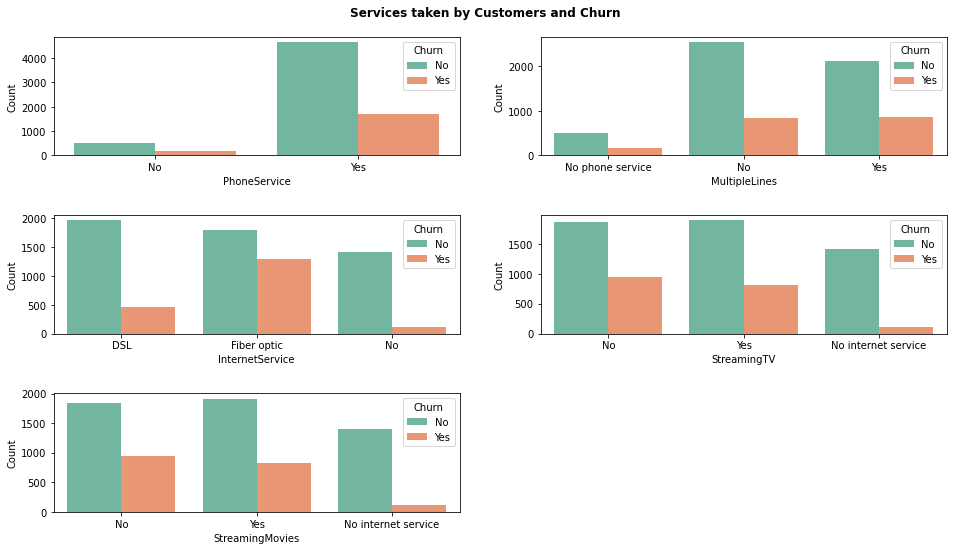

In [36]:
# Create a grid of plots for services taken by customers

plt.figure(figsize=(16, 14))

features = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
target = data['Churn']

for i, col in enumerate(features):
    plt.subplot( len(features),2, i+1)
    x = data[col]
    y = target
    sns.countplot(x,hue=y, palette = 'Set2')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.subplots_adjust(hspace=0.5, top=0.95)
    plt.suptitle('Services taken by Customers and Churn', fontweight='bold')
      

*The below are the observations taken from the features which are related to services taken by customers.*

1. Those customers who have taken Fibre Optics as the internet service are most likely to churn.
2. Customer's having streaming and TV services has high customer churn as compared to those doesn't have any internet services.

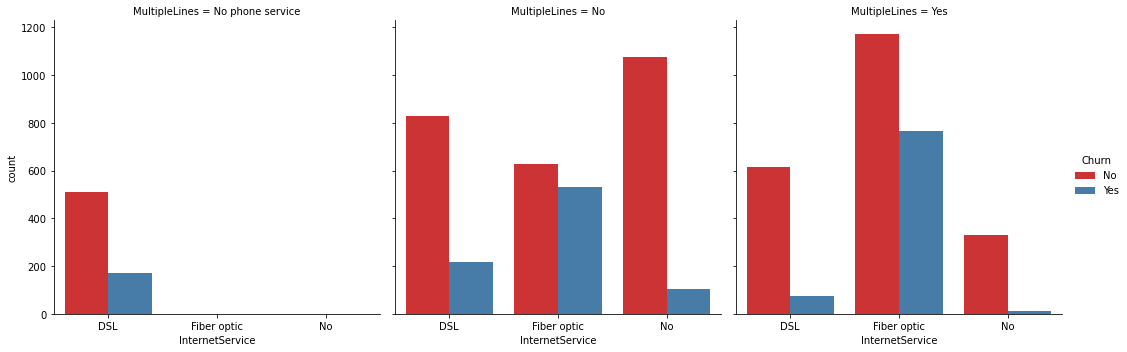

In [37]:
# Multivariate Analysis
sns.catplot(x='InternetService', hue='Churn', col='MultipleLines', data=data, kind='count',palette = 'Set1')
plt.show()

*Customers having Fibre optics and multiple line are high likely to churn.*

#### 6.7 CHURN ANALYSIS BASED ON TENURE OF SERVICE

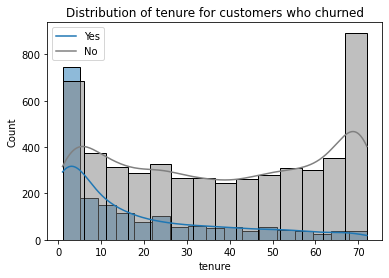

In [38]:
# Distribution of tenure for customers who churned and who didn't churn
sns.histplot(data=data[data['Churn']=='Yes'], x='tenure', kde=True)
sns.histplot(data=data[data['Churn']=='No'], x='tenure', kde=True, color = 'gray')
plt.title('Distribution of tenure for customers who churned')
plt.legend(['Yes', 'No'])
plt.show()

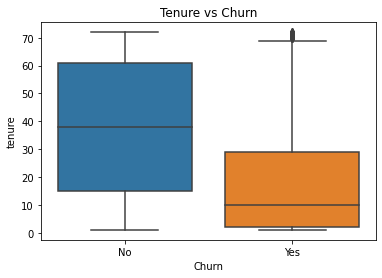

In [39]:
sns.boxplot(data=data, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()

*From these plots, we can see that the customers who churned tend to have lower tenures compared to those who didn't churn. We can see that the median tenure for customers who churned is lower than that of customers who didn't churn.*

In [40]:
# Create tenure ranges
tenure_ranges = [(0, 12), (12, 24), (24, 36), (36, 48), (48, 60), (60, 72)]
churn_rates = []

# Calculate churn rate for each tenure range
for i, tenure_range in enumerate(tenure_ranges):
    churn_rate = data[(data['tenure'] >= tenure_range[0]) & (data['tenure'] < tenure_range[1])]['Churn_binary'].mean()
    print(f"Tenure range {i+1}: {round(churn_rate*100, 2)}%")
    churn_rates.append(round(churn_rate*100, 2))

Tenure range 1: 48.54%
Tenure range 2: 29.51%
Tenure range 3: 22.03%
Tenure range 4: 19.52%
Tenure range 5: 15.0%
Tenure range 6: 8.3%


*We can see that the churn rate tends to be higher for customers with lower tenures.*

#### 6.8 CHURN ANALYSIS BASED ON ONLINE SECURITY AND BACKUP

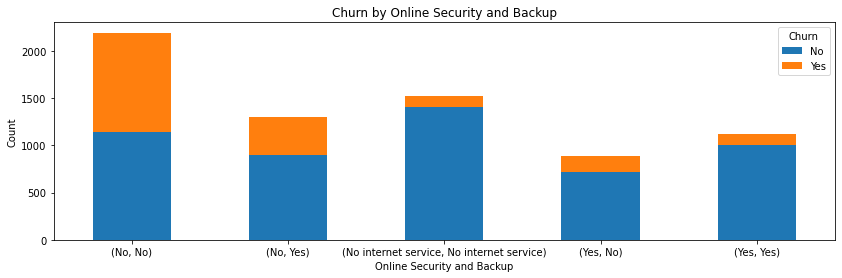

In [41]:
# Creating a contingency table and visualize the results using a stacked bar chart
table = pd.crosstab([data['OnlineSecurity'], data['OnlineBackup']], data['Churn'])

table.plot(kind='bar', stacked=True, figsize=(14,4))
plt.xticks(rotation=0)
plt.xlabel('Online Security and Backup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.title('Churn by Online Security and Backup')
plt.show()

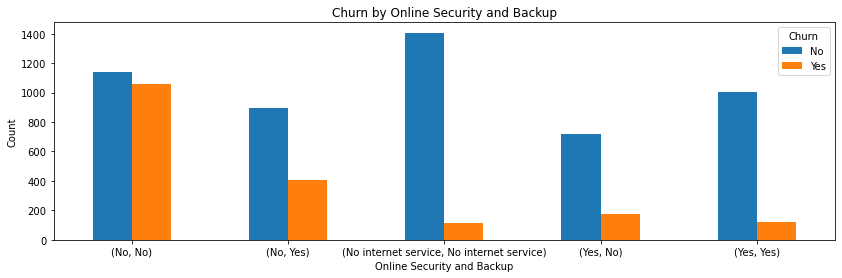

In [47]:
table = pd.crosstab([data['OnlineSecurity'], data['OnlineBackup']], data['Churn'])

table.plot(kind='bar', stacked=False, figsize=(14,4))
plt.xticks(rotation=0)
plt.xlabel('Online Security and Backup')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.title('Churn by Online Security and Backup')
plt.show()

In [42]:
table['total'] = table.sum(axis=1)
table['churn_rate'] = round(table['Yes'] / table['total'] * 100, 2)
print("Online Security and Backup Churn Rate:")
table

Online Security and Backup Churn Rate:


Churn                                      No   Yes  total  churn_rate
OnlineSecurity      OnlineBackup                                      
No                  No                   1138  1057   2195       48.15
                    Yes                   898   404   1302       31.03
No internet service No internet service  1407   113   1520        7.43
Yes                 No                    716   176    892       19.73
                    Yes                  1004   119   1123       10.60

*From the chart, we can see that customers who do not have online security or backup are more likely to churn than those who have these services. Additionally, customers who have online security and backup are less likely to churn than those who have only one of these services or none at all.*

#### 6.8 CHURN ANALYSIS BASED ON PAYMENT METHOD AND BIILING

Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


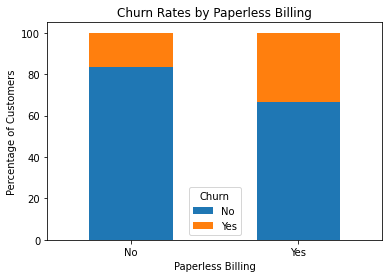

In [43]:
# create cross-tabulation table of PaperlessBilling and Churn
paperless_churn = pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index') * 100
print(paperless_churn)

# plot bar chart of churn rates for each category of PaperlessBilling
ax = paperless_churn.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Churn Rates by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='best')
plt.show()

Churn                    No        Yes
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


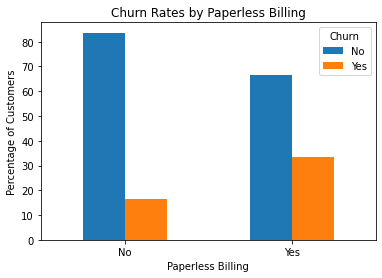

In [48]:
# create cross-tabulation table of PaperlessBilling and Churn
paperless_churn = pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index') * 100
print(paperless_churn)

# plot bar chart of churn rates for each category of PaperlessBilling
ax = paperless_churn.plot(kind='bar', stacked=False, figsize=(6,4))
plt.title('Churn Rates by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='best')
plt.show()

*Customers who use paperless billing are slightly more likely to churn. This suggests that the company should investigate why this is the case and consider offering incentives or other measures to encourage customers to switch to paperless billing.*

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


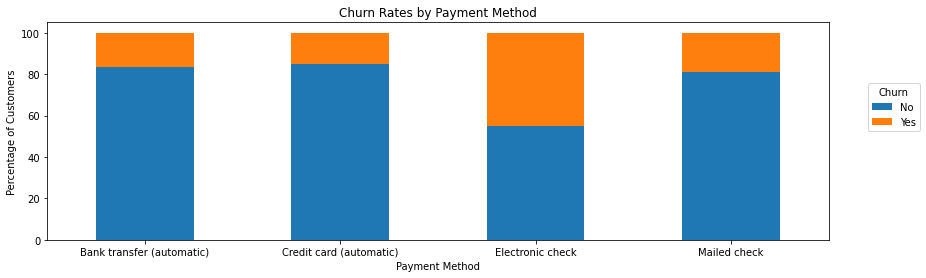

In [44]:
# create cross-tabulation table of PaymentMethod and Churn
payment_churn = pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') * 100
print(payment_churn)


# plot bar chart of churn rates for each category of PaymentMethod
ax = payment_churn.plot(kind='bar', stacked=True, figsize=(14,4))
plt.title('Churn Rates by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc=(1.05,0.5))
plt.show()

*Customers who pay by electronic check are more likely to churn than those who pay by other methods.*

#### 6.9 CORRELATION ANALYSIS

Text(0.5, 1.0, 'Correlation Matrix')

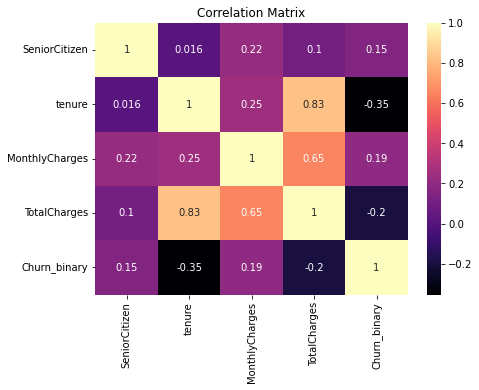

In [45]:
# get correalted values
corr_df = data.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_df, annot=True, cmap='magma')
plt.title('Correlation Matrix')

*There is a multi-collinearity present between total charges and tenure. It means with increase in tenure the customers tend to charged more. This might be the reason as customer stays longer with a telecom vendor they most likely to take other services as well.*

#### 6.10 CHURN ANALYSIS WITH TOTAL CHARGES AND TENURE

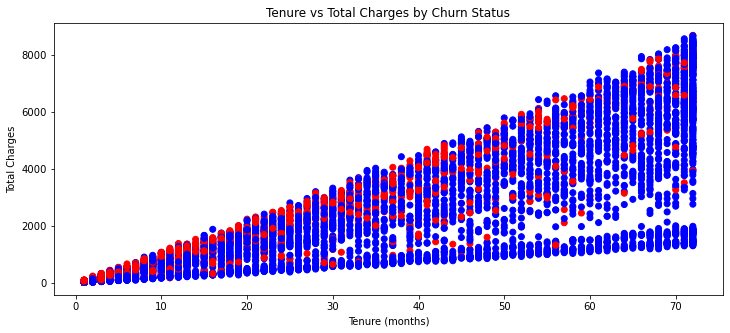

In [46]:
churn_colors = {'No': 'blue', 'Yes': 'red'}
data['Churn_color'] = data['Churn'].map(churn_colors)

plt.figure(figsize=(12,5))
plt.scatter(data['tenure'], data['TotalCharges'], c=data['Churn_color'])
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.title('Tenure vs Total Charges by Churn Status')
plt.show()

# Drop churn color
data = data.drop(columns = ['Churn_color'])

*The customer churn rate is decreasing with increase in tenure and total charges. Most of the customers are retained with increase in tenure.*